# After Steroid Era Section

In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

In [312]:
# Create a hitting dataframe
hitting_df_cleaned = pd.read_csv('hitting_df_cleaned.csv')

In [313]:
hitting_df_cleaned.head()

,yearID,AB,H,HR,BA,SLG,OPS,HR_prior,HR_increase,BA_increase,SLG_increase,OPS_increase
0,1994,345,86,9,0.249,0.394,0.687,0.0,0.000,0.000,0.000,0.000
1,1995,420,107,17,0.255,0.452,0.773,9.0,88.889,2.201,14.758,12.653
2,1996,320,81,8,0.253,0.428,0.735,17.0,-52.941,-0.643,-5.362,-4.920
3,1997,252,69,6,0.274,0.433,0.747,8.0,-25.000,8.172,1.031,1.601
4,2006,255,54,5,0.212,0.333,0.605,0.0,0.000,0.000,0.000,0.000


In [314]:
after_df =hitting_df_cleaned[(hitting_df_cleaned['yearID'] >= 2005) & (hitting_df_cleaned['yearID'] <= 2014)]

In [315]:
after_df.round(3).describe()

,yearID,AB,H,HR,BA,SLG,OPS,HR_prior,HR_increase,BA_increase,SLG_increase,OPS_increase
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,2009.357462,455.938027,124.546852,15.176004,0.270533,0.437340,0.777617,13.353000,10.303524,-0.761429,-0.969594,-0.973340
std,2.886173,120.323686,39.050142,9.375609,0.028880,0.065246,0.092342,11.090909,73.289332,10.409820,13.728302,10.857959
min,2005.000000,222.000000,41.000000,3.000000,0.179000,0.278000,0.536000,0.000000,-88.462000,-33.021000,-41.711000,-33.203000
25%,2007.000000,354.000000,92.000000,8.000000,0.250000,0.391000,0.713000,4.000000,-26.316000,-6.661000,-8.827000,-7.383000
50%,2009.000000,471.000000,126.000000,13.000000,0.271000,0.431000,0.771000,12.000000,0.000000,0.000000,0.000000,0.000000
75%,2012.000000,558.000000,155.000000,21.000000,0.290000,0.479000,0.835000,21.000000,21.739000,3.845000,4.897000,3.705000
max,2014.000000,716.000000,238.000000,58.000000,0.365000,0.680000,1.106000,58.000000,966.667000,46.534000,118.660000,81.036000


In [316]:
after_df.corr()

,yearID,AB,H,HR,BA,SLG,OPS,HR_prior,HR_increase,BA_increase,SLG_increase,OPS_increase
yearID,1.000000,-0.017088,-0.072017,-0.077649,-0.178053,-0.172948,-0.196008,-0.052137,0.010268,-0.026410,-0.028156,-0.031889
AB,-0.017088,1.000000,0.948691,0.509818,0.346080,0.274689,0.293874,0.320287,0.207221,0.073296,0.056141,0.068305
H,-0.072017,0.948691,1.000000,0.500820,0.612239,0.430097,0.480309,0.296673,0.218368,0.229626,0.175440,0.202869
HR,-0.077649,0.509818,0.500820,1.000000,0.228852,0.796004,0.711006,0.556178,0.304660,0.119674,0.262779,0.241378
BA,-0.178053,0.346080,0.612239,0.228852,1.000000,0.624771,0.726877,0.085295,0.143447,0.521174,0.396120,0.448715
SLG,-0.172948,0.274689,0.430097,0.796004,0.624771,1.000000,0.960428,0.392919,0.280734,0.380574,0.475855,0.470925
OPS,-0.196008,0.293874,0.480309,0.711006,0.726877,0.960428,1.000000,0.378460,0.237043,0.418633,0.451729,0.478973
HR_prior,-0.052137,0.320287,0.296673,0.556178,0.085295,0.392919,0.378460,1.000000,-0.244832,-0.119709,-0.252762,-0.220339
HR_increase,0.010268,0.207221,0.218368,0.304660,0.143447,0.280734,0.237043,-0.244832,1.000000,0.281142,0.629020,0.537384
BA_increase,-0.026410,0.073296,0.229626,0.119674,0.521174,0.380574,0.418633,-0.119709,0.281142,1.000000,0.777542,0.865473


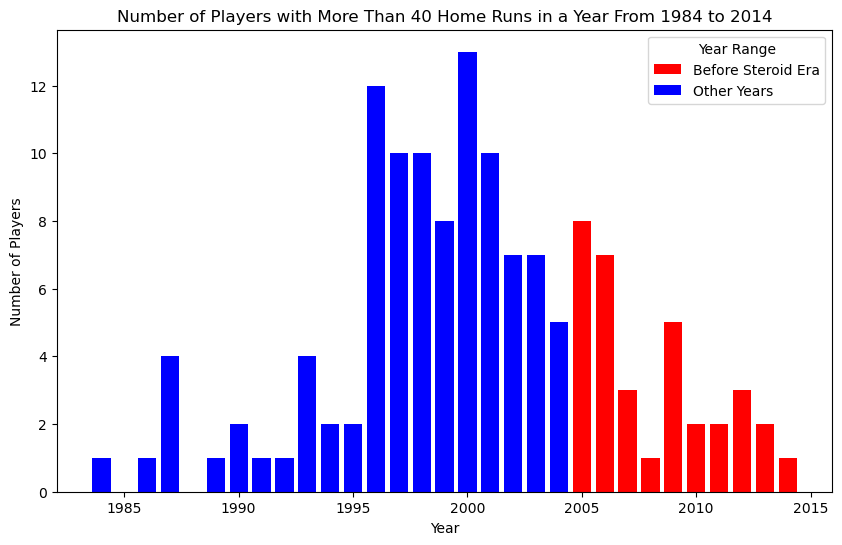

In [317]:
import matplotlib.pyplot as plt

# Filter for players who hit more than 40 home runs
home_run_threshold = 40
after_df_over_40 = hitting_df_cleaned[hitting_df_cleaned['HR'] >= home_run_threshold]

# Count the number of players per year
players_per_year = after_df_over_40['yearID'].value_counts().sort_index()

# Define the years to highlight
highlight_years = range(2005, 2015)

# Create a list of colors for each year
colors = ['red' if year in highlight_years else 'blue' for year in players_per_year.index]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(players_per_year.index, players_per_year.values, color=colors)
plt.xlabel('Year')
plt.ylabel('Number of Players')
plt.title('Number of Players with More Than 40 Home Runs in a Year From 1984 to 2014')

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', label='Before Steroid Era'),
                   Patch(facecolor='blue', label='Other Years')]

# Add legend to plot
plt.legend(handles=legend_elements, title='Year Range')

# Show plot
plt.show()


This histogram shows the number of players who it over 40 home runs in a single year with the post-steroid era section of the graph highlighted.

In [318]:
#display before steroid era dataframe
after_df.describe().round(3)

,yearID,AB,H,HR,BA,SLG,OPS,HR_prior,HR_increase,BA_increase,SLG_increase,OPS_increase
count,2017.000,2017.000,2017.000,2017.000,2017.000,2017.000,2017.000,2017.000,2017.000,2017.000,2017.000,2017.000
mean,2009.357,455.938,124.547,15.176,0.271,0.437,0.778,13.353,10.304,-0.761,-0.970,-0.973
std,2.886,120.324,39.050,9.376,0.029,0.065,0.092,11.091,73.289,10.410,13.728,10.858
min,2005.000,222.000,41.000,3.000,0.179,0.278,0.536,0.000,-88.462,-33.021,-41.711,-33.203
25%,2007.000,354.000,92.000,8.000,0.250,0.391,0.713,4.000,-26.316,-6.661,-8.827,-7.383
50%,2009.000,471.000,126.000,13.000,0.271,0.431,0.771,12.000,0.000,0.000,0.000,0.000
75%,2012.000,558.000,155.000,21.000,0.290,0.479,0.835,21.000,21.739,3.845,4.897,3.705
max,2014.000,716.000,238.000,58.000,0.365,0.680,1.106,58.000,966.667,46.534,118.660,81.036


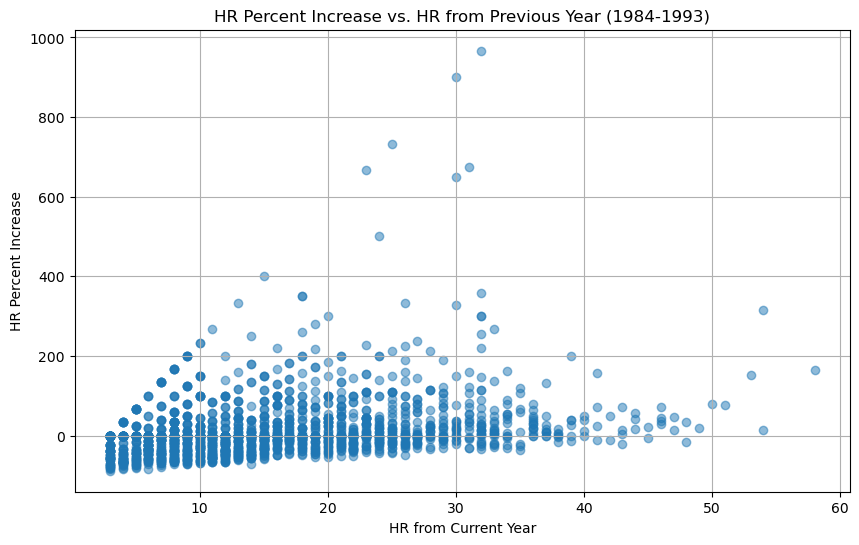

In [319]:
plt.figure(figsize=(10, 6))
plt.scatter(after_df['HR'], after_df['HR_increase'], alpha=0.5)
plt.title('HR Percent Increase vs. HR from Previous Year (1984-1993)')
plt.xlabel('HR from Current Year')
plt.ylabel('HR Percent Increase')
plt.grid(True)
plt.show()

This scatterplot shows the number of home runs in a given year, and the percentage higher the count was from the previous year. A higher percentage increase means that that player had a significant jump in performance over the course of just one year.

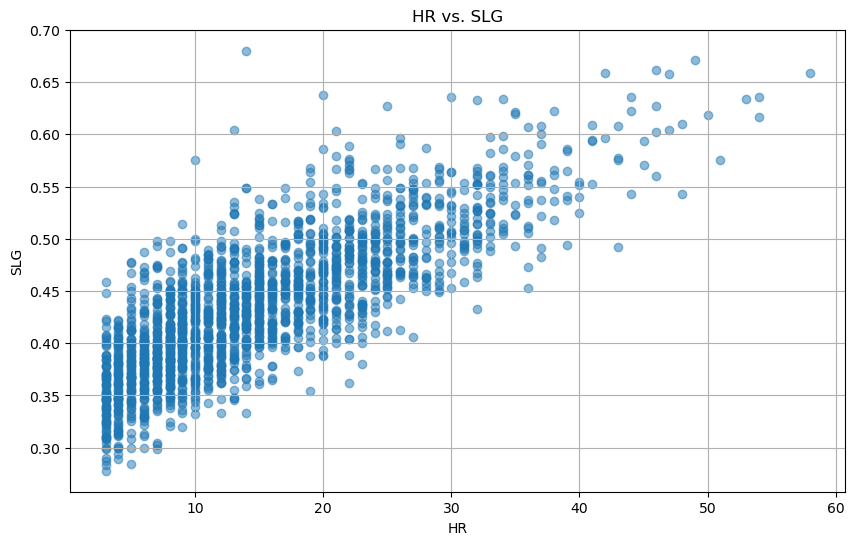

In [320]:
plt.figure(figsize=(10, 6))
plt.scatter(after_df['HR'], after_df['SLG'], alpha=0.5)
plt.title('HR vs. SLG')
plt.xlabel('HR')
plt.ylabel('SLG')
plt.grid(True)
plt.show()

It makes sense that as the number of home runs increases, the slugging percentage also increase, since slugging percentage takes into account extra base hits, including home runs, this is a great indication of a hitters power.

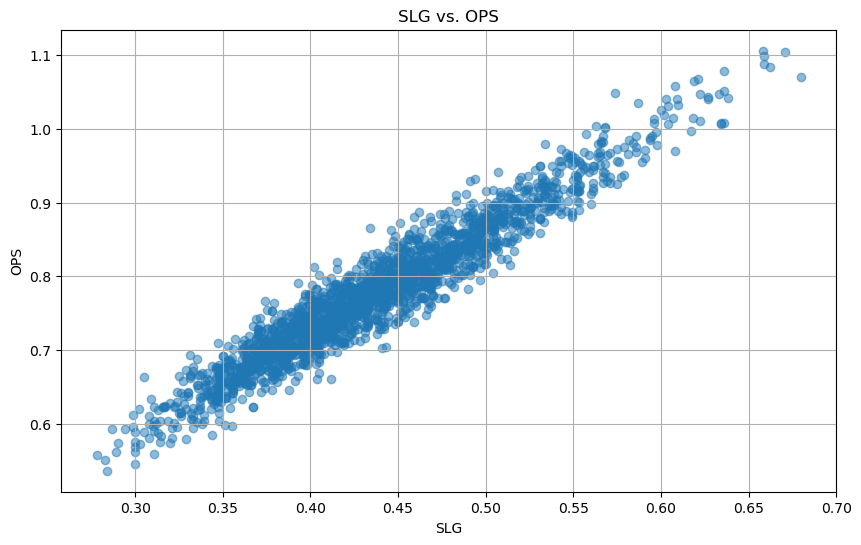

In [321]:
plt.figure(figsize=(10, 6))
plt.scatter(after_df['SLG'], after_df['OPS'], alpha=0.5)
plt.title('SLG vs. OPS')
plt.xlabel('SLG')
plt.ylabel('OPS')
plt.grid(True)
plt.show()

This scatterplot shows the slugging percentage vs the On-base plus Slugging percentage, as the SLG increases, the OPS also increases because the better hitter they are, the more they will get one base.

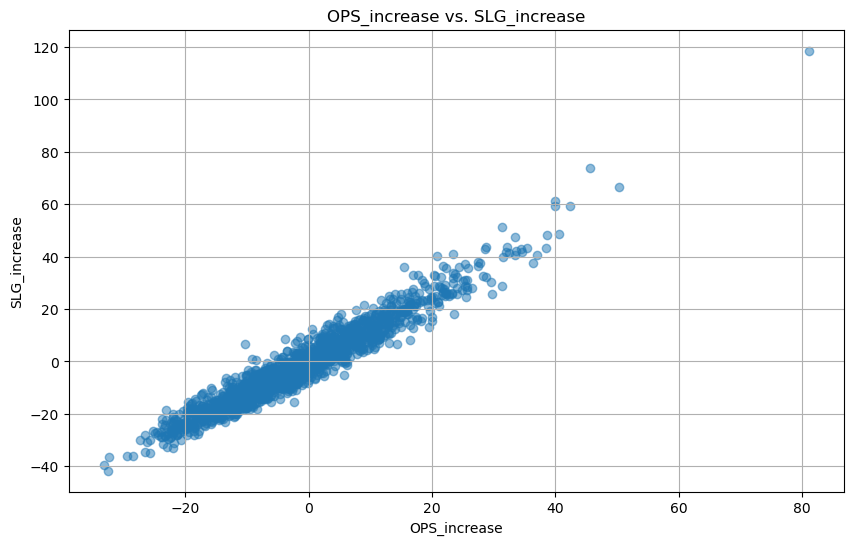

In [322]:
plt.figure(figsize=(10, 6))
plt.scatter(after_df['OPS_increase'], after_df['SLG_increase'], alpha=0.5)
plt.title('OPS_increase vs. SLG_increase')
plt.xlabel('OPS_increase')
plt.ylabel('SLG_increase')
plt.grid(True)
plt.show()

As the OPS_increase gets larger, the SLG_increase also grows larger because SLG is one of the variables that makes up OPS, so as one increases, so does the other.

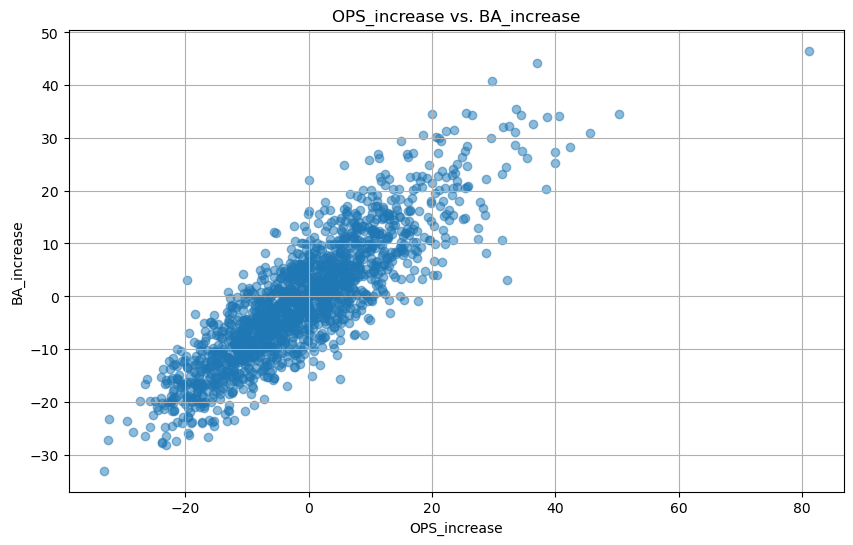

In [323]:
plt.figure(figsize=(10, 6))
plt.scatter(after_df['OPS_increase'], after_df['BA_increase'], alpha=0.5)
plt.title('OPS_increase vs. BA_increase')
plt.xlabel('OPS_increase')
plt.ylabel('BA_increase')
plt.grid(True)
plt.show()

As the OPS_increase grows larger, so does the BA_increase because a higher batting average means they are getting more hits, thus increasing the OPS.

### KMeans Section

In [324]:
#scale the features, using MinMaxScaler, to between 0 and 1.
scaler = StandardScaler()
after_df = scaler.fit_transform(after_df)

In [325]:
# Initialize a list to store the values of inertia (within-cluster sum of squares)
inertia = []

In [326]:
# Iterate over a range of values for K (number of clusters)
for k in range(1, 11):
    # Create a KMeans instance with K clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    # Fit the model to the data
    kmeans.fit(after_df)
    # Append the inertia to the list
    inertia.append(kmeans.inertia_)

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Window

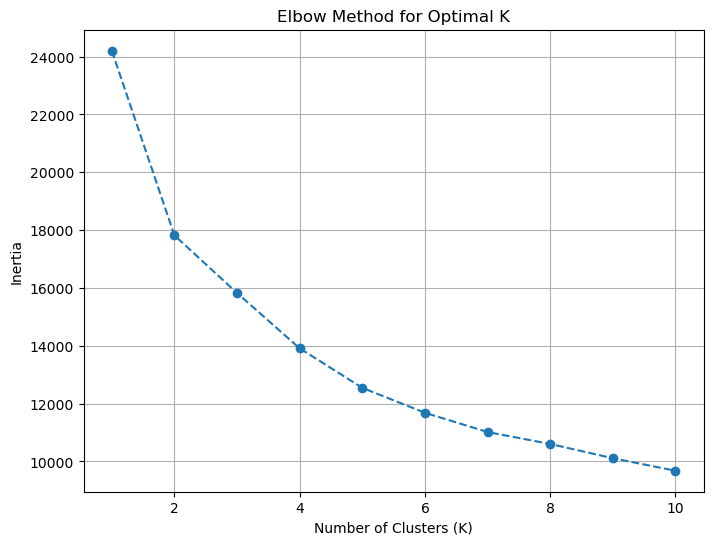

In [327]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

### KMeans for HR vs. HR Percent Increase

In [328]:
# Perform k-means clustering with K=3
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(after_df)
labels = kmeans.labels_

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [329]:
# Define custom colors for each class
custom_colors = ['teal', 'purple', 'blue', 'red', 'orange']

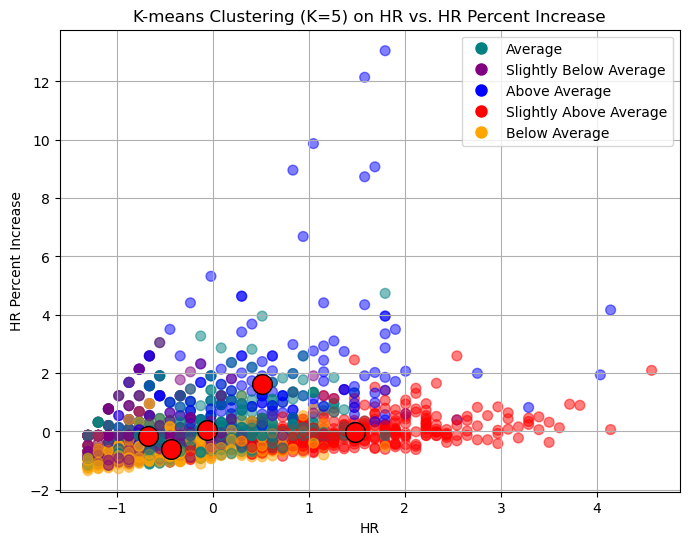

In [330]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot the points with color based on the cluster labels
plt.scatter(after_df[:, 3], after_df[:, 8], c=labels, cmap=ListedColormap(custom_colors), s=50, alpha=0.5)

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 3], centroids[:, 8], marker='o', c='red', s=200, edgecolors='k')

# Add legend specifying the class of wine for each cluster
legend_labels = ['Average', 'Slightly Below Average', 'Above Average', 'Slightly Above Average', 'Below Average']  # Custom labels for each class
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(custom_colors, legend_labels)]

# Add the legend to the plot
plt.legend(handles=legend_handles)

plt.xlabel('HR')
plt.ylabel('HR Percent Increase')
plt.title('K-means Clustering (K=5) on HR vs. HR Percent Increase')
plt.grid(True)
plt.show()

In [331]:
# Count the number of players in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of players in each cluster:", cluster_counts)

# Assuming label 2 corresponds to "Above Average"
above_average_count = cluster_counts[2]
print("Number of 'Above Average' players:", above_average_count)

Number of players in each cluster: {0: 569, 1: 556, 2: 186, 3: 322, 4: 384}
Number of 'Above Average' players: 186


In [332]:
total_players = len(labels)
percentage_above_average = (above_average_count / total_players) * 100
print(f"Percentage of 'Above Average' players: {percentage_above_average:.2f}%")

Percentage of 'Above Average' players: 9.22%


### KMeans for HR vs. SLG

In [333]:
# Perform k-means clustering with K=3
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(after_df)
labels = kmeans.labels_

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [334]:
# Define custom colors for each class
custom_colors = ['teal', 'purple', 'blue', 'red', 'orange']

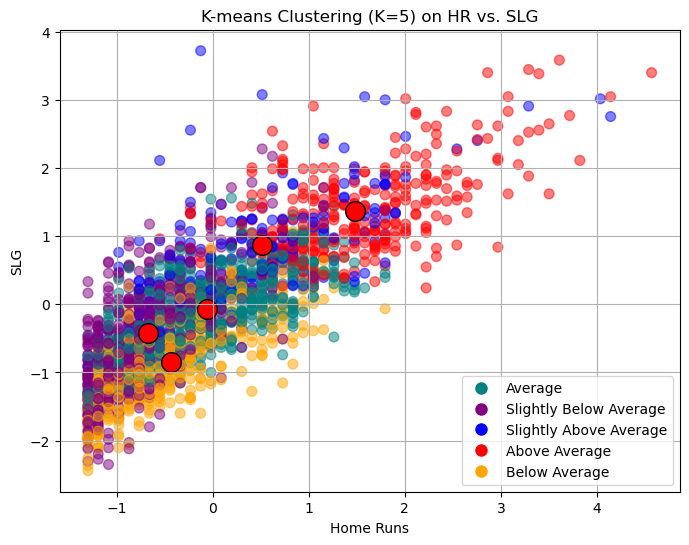

In [335]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot the points with color based on the cluster labels
plt.scatter(after_df[:, 3], after_df[:, 5], c=labels, cmap=ListedColormap(custom_colors), s=50, alpha=0.5)

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 3], centroids[:, 5], marker='o', c='red', s=200, edgecolors='k')

# Add legend specifying the class of wine for each cluster
legend_labels = ['Average', 'Slightly Below Average', 'Slightly Above Average', 'Above Average', 'Below Average']  # Custom labels for each class
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(custom_colors, legend_labels)]

# Add the legend to the plot
plt.legend(handles=legend_handles)

plt.xlabel('Home Runs')
plt.ylabel('SLG')
plt.title('K-means Clustering (K=5) on HR vs. SLG')
plt.grid(True)
plt.show()

In [336]:
# Count the number of players in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of players in each cluster:", cluster_counts)

# Assuming label 2 corresponds to "Above Average"
above_average_count = cluster_counts[3]
print("Number of 'Above Average' players:", above_average_count)

Number of players in each cluster: {0: 569, 1: 556, 2: 186, 3: 322, 4: 384}
Number of 'Above Average' players: 322


In [337]:
total_players = len(labels)
percentage_above_average = (above_average_count / total_players) * 100
print(f"Percentage of 'Above Average' players: {percentage_above_average:.2f}%")

Percentage of 'Above Average' players: 15.96%


### KMeans for SLG vs. OPS

In [338]:
# Define custom colors for each class
custom_colors = ['teal', 'purple', 'blue', 'red', 'orange']

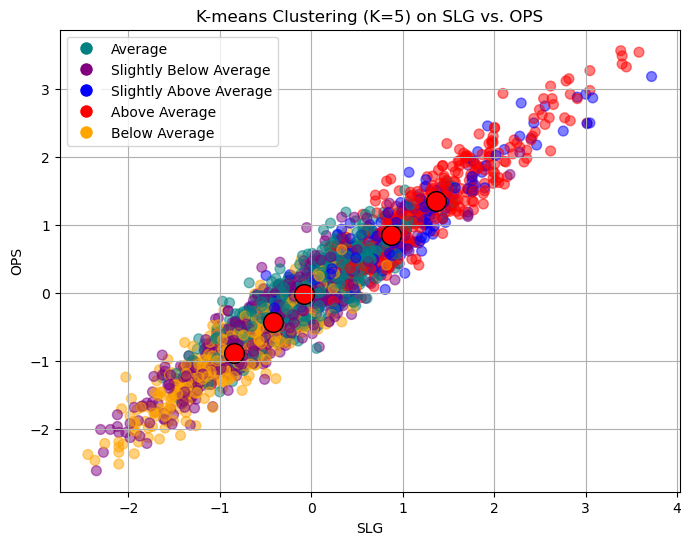

In [339]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot the points with color based on the cluster labels
plt.scatter(after_df[:, 5], after_df[:, 6], c=labels, cmap=ListedColormap(custom_colors), s=50, alpha=0.5)

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 5], centroids[:, 6], marker='o', c='red', s=200, edgecolors='k')

# Add legend specifying the class of wine for each cluster
legend_labels = ['Average', 'Slightly Below Average', 'Slightly Above Average', 'Above Average', 'Below Average']  # Custom labels for each class
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(custom_colors, legend_labels)]

# Add the legend to the plot
plt.legend(handles=legend_handles)

plt.xlabel('SLG')
plt.ylabel('OPS')
plt.title('K-means Clustering (K=5) on SLG vs. OPS')
plt.grid(True)
plt.show()

In [340]:
# Count the number of players in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of players in each cluster:", cluster_counts)

# Assuming label 2 corresponds to "Above Average"
above_average_count = cluster_counts[3]
print("Number of 'Above Average' players:", above_average_count)

Number of players in each cluster: {0: 569, 1: 556, 2: 186, 3: 322, 4: 384}
Number of 'Above Average' players: 322


In [341]:
total_players = len(labels)
percentage_above_average = (above_average_count / total_players) * 100
print(f"Percentage of 'Above Average' players: {percentage_above_average:.2f}%")

Percentage of 'Above Average' players: 15.96%


### KMeans for OPS Increase vs. SLG Increase

In [342]:
# Define custom colors for each class
custom_colors = ['teal', 'purple', 'blue', 'red', 'orange']

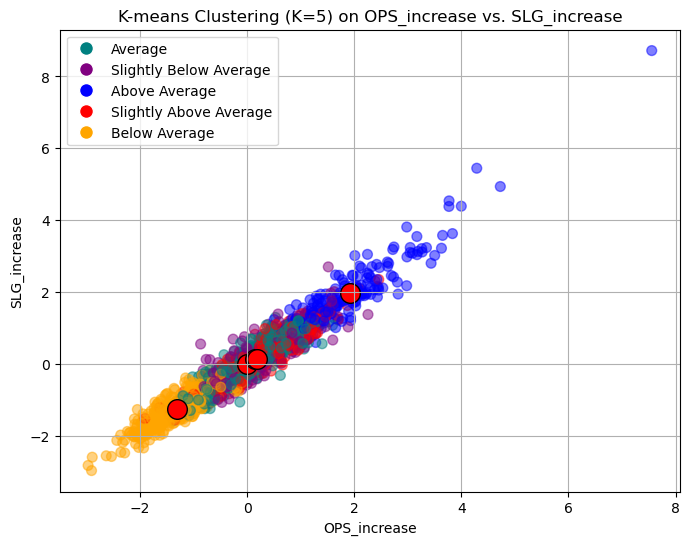

In [343]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot the points with color based on the cluster labels
plt.scatter(after_df[:, 11], after_df[:, 10], c=labels, cmap=ListedColormap(custom_colors), s=50, alpha=0.5)

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 11], centroids[:, 10], marker='o', c='red', s=200, edgecolors='k')

# Add legend specifying the class of wine for each cluster
legend_labels = ['Average', 'Slightly Below Average', 'Above Average', 'Slightly Above Average', 'Below Average']  # Custom labels for each class
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(custom_colors, legend_labels)]

# Add the legend to the plot
plt.legend(handles=legend_handles)

plt.xlabel('OPS_increase')
plt.ylabel('SLG_increase')
plt.title('K-means Clustering (K=5) on OPS_increase vs. SLG_increase')
plt.grid(True)
plt.show()

In [344]:
# Count the number of players in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of players in each cluster:", cluster_counts)

# Assuming label 2 corresponds to "Above Average"
above_average_count = cluster_counts[2]
print("Number of 'Above Average' players:", above_average_count)

Number of players in each cluster: {0: 569, 1: 556, 2: 186, 3: 322, 4: 384}
Number of 'Above Average' players: 186


In [345]:
total_players = len(labels)
percentage_above_average = (above_average_count / total_players) * 100
print(f"Percentage of 'Above Average' players: {percentage_above_average:.2f}%")

Percentage of 'Above Average' players: 9.22%


### KMeans for OPS_increase vs. BA_increase

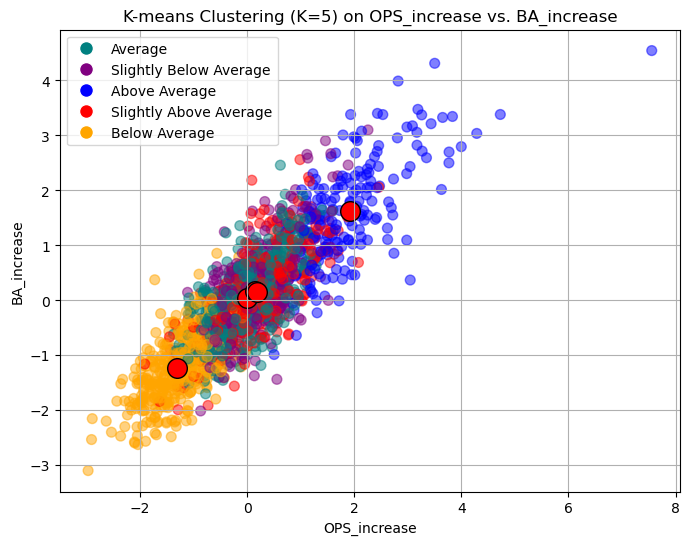

In [346]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot the points with color based on the cluster labels
plt.scatter(after_df[:, 11], after_df[:, 9], c=labels, cmap=ListedColormap(custom_colors), s=50, alpha=0.5)

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 11], centroids[:, 9], marker='o', c='red', s=200, edgecolors='k')

# Add legend specifying the class of wine for each cluster
legend_labels = ['Average', 'Slightly Below Average', 'Above Average', 'Slightly Above Average', 'Below Average']  # Custom labels for each class
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(custom_colors, legend_labels)]

# Add the legend to the plot
plt.legend(handles=legend_handles)

plt.xlabel('OPS_increase')
plt.ylabel('BA_increase')
plt.title('K-means Clustering (K=5) on OPS_increase vs. BA_increase')
plt.grid(True)
plt.show()

In [347]:
# Count the number of players in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of players in each cluster:", cluster_counts)

# Assuming label 2 corresponds to "Above Average"
above_average_count = cluster_counts[2]
print("Number of 'Above Average' players:", above_average_count)

Number of players in each cluster: {0: 569, 1: 556, 2: 186, 3: 322, 4: 384}
Number of 'Above Average' players: 186


In [348]:
total_players = len(labels)
percentage_above_average = (above_average_count / total_players) * 100
print(f"Percentage of 'Above Average' players: {percentage_above_average:.2f}%")

Percentage of 'Above Average' players: 9.22%


In [349]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(after_df)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

In [350]:
# Perform k-means clustering with K=3
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(after_df)
labels = kmeans.labels_

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [351]:
# Define custom colors for each class
custom_colors = ['teal', 'purple', 'blue', 'red', 'orange']

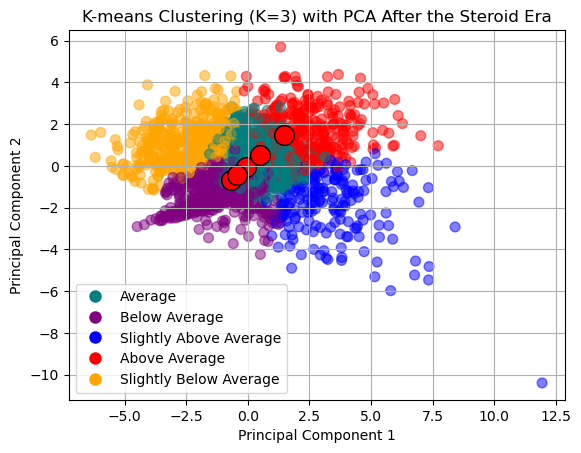

In [352]:
# Plot the points with color based on the cluster labels
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'], c=labels, cmap=ListedColormap(custom_colors), s=50, alpha=0.5)

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 3], centroids[:, 3], marker='o', c='red', s=200, edgecolors='k')

# Add legend specifying the class of wine for each cluster
legend_labels = ['Average', 'Below Average', 'Slightly Above Average', 'Above Average', 'Slightly Below Average']  # Custom labels for each class
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(custom_colors, legend_labels)]
plt.legend(handles=legend_handles)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering (K=3) with PCA After the Steroid Era')
plt.grid(True)
plt.show()

In [353]:
# Count the number of players in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of players in each cluster:", cluster_counts)

# Assuming label 2 corresponds to "Above Average"
above_average_count = cluster_counts[3]
print("Number of 'Above Average' players:", above_average_count)

Number of players in each cluster: {0: 569, 1: 556, 2: 186, 3: 322, 4: 384}
Number of 'Above Average' players: 322


In [354]:
total_players = len(labels)
percentage_above_average = (above_average_count / total_players) * 100
print(f"Total Players: {total_players:.2f}")
print(f"Percentage of 'Above Average' players: {percentage_above_average:.2f}%")

Total Players: 2017.00
Percentage of 'Above Average' players: 15.96%
